<a href="https://colab.research.google.com/github/ClarisseAlvarenga/lives_twitch/blob/master/Esquenta_Imers%C3%A3o_Alura_2020_2_edi%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ESQUENTA IMERSÃO ALURA - ENEM**


FONTE DE DADOS: 

http://inep.gov.br/microdados 

https://github.com/alura-cursos/imersao-dados-2-2020

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#para setar o número de linhas e colunas visíveis no dataset
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 150)


In [2]:
#para ler dados direto do ZIPFile
"""from zipfile import ZipFile"""

'from zipfile import ZipFile'

In [3]:
#abrindo o arquivo zip usando o zipfile, abrindo todos os arquivos finalizados em csv
"""zip_file = ZipFile('microdados_enem_2019.zip')
dfs = {text_file.filename: pd.read_csv(zip_file.open(text_file.filename))
for text_file in zip_file.infolist() if text_file.filename.endswith('.csv')}
list(zip(dfs))"""

"zip_file = ZipFile('microdados_enem_2019.zip')\ndfs = {text_file.filename: pd.read_csv(zip_file.open(text_file.filename))\nfor text_file in zip_file.infolist() if text_file.filename.endswith('.csv')}\nlist(zip(dfs))"

In [4]:
#primeira leitura dos dados
pd.read_csv('https://raw.githubusercontent.com/alura-cursos/imersao-dados-2-2020/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv')

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1506138,Redenção,15,PA,1,1,1,1,506.0,509.0,514.0,517.0,435.6,512.3,488.6,432.4,DACDDEDEDAADCBCBDBDBBBDCCACDECADCCCBCBACCCCEA,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1504208,Marabá,15,PA,0,1,1,0,NaN,508.0,512.0,NaN,NaN,409.3,375.3,NaN,NaN,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1501402,Belém,15,PA,1,1,1,1,503.0,508.0,512.0,515.0,423.2,499.1,441.0,427.2,DDEACAECCC*BCDBAACDACCBAEBBCEEEAECABBCECBBEAA,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,19000100473

In [5]:
#colocando em uma variável para estudo
enem = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/imersao-dados-2-2020/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv')

In [6]:
#visualizando os primeiros dados
enem.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1506138,Redenção,15,PA,1,1,1,1,506.0,509.0,514.0,517.0,435.6,512.3,488.6,432.4,DACDDEDEDAADCBCBDBDBBBDCCACDECADCCCBCBACCCCEA,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1504208,Marabá,15,PA,0,1,1,0,NaN,508.0,512.0,NaN,NaN,409.3,375.3,NaN,NaN,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1501402,Belém,15,PA,1,1,1,1,503.0,508.0,512.0,515.0,423.2,499.1,441.0,427.2,DDEACAECCC*BCDBAACDACCBAEBBCEEEAECABBCECBBEAA,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,19000100473

In [7]:
#vendo as colunas
colunas = list(enem.columns)

In [8]:
colunas

['NU_INSCRICAO',
 'NU_ANO',
 'CO_MUNICIPIO_RESIDENCIA',
 'NO_MUNICIPIO_RESIDENCIA',
 'CO_UF_RESIDENCIA',
 'SG_UF_RESIDENCIA',
 'NU_IDADE',
 'TP_SEXO',
 'TP_ESTADO_CIVIL',
 'TP_COR_RACA',
 'TP_NACIONALIDADE',
 'CO_MUNICIPIO_NASCIMENTO',
 'NO_MUNICIPIO_NASCIMENTO',
 'CO_UF_NASCIMENTO',
 'SG_UF_NASCIMENTO',
 'TP_ST_CONCLUSAO',
 'TP_ANO_CONCLUIU',
 'TP_ESCOLA',
 'TP_ENSINO',
 'IN_TREINEIRO',
 'CO_ESCOLA',
 'CO_MUNICIPIO_ESC',
 'NO_MUNICIPIO_ESC',
 'CO_UF_ESC',
 'SG_UF_ESC',
 'TP_DEPENDENCIA_ADM_ESC',
 'TP_LOCALIZACAO_ESC',
 'TP_SIT_FUNC_ESC',
 'IN_BAIXA_VISAO',
 'IN_CEGUEIRA',
 'IN_SURDEZ',
 'IN_DEFICIENCIA_AUDITIVA',
 'IN_SURDO_CEGUEIRA',
 'IN_DEFICIENCIA_FISICA',
 'IN_DEFICIENCIA_MENTAL',
 'IN_DEFICIT_ATENCAO',
 'IN_DISLEXIA',
 'IN_DISCALCULIA',
 'IN_AUTISMO',
 'IN_VISAO_MONOCULAR',
 'IN_OUTRA_DEF',
 'IN_GESTANTE',
 'IN_LACTANTE',
 'IN_IDOSO',
 'IN_ESTUDA_CLASSE_HOSPITALAR',
 'IN_SEM_RECURSO',
 'IN_BRAILLE',
 'IN_AMPLIADA_24',
 'IN_AMPLIADA_18',
 'IN_LEDOR',
 'IN_ACESSO',
 'IN_TRANSCRICA

In [9]:
#criando dicionários de dados para facilitar a análise
genero = { 'M': 0, 'F':1}
estado_civil = {
      0:'não informado',
      1:'solteiro(a)',
      2:'casado(a)/união estável', 
      3:'divorciado(a)',
      4:'viúvo(a)'}
cor = {
    0: 'não declarado',
    1: 'branca',
    2: 'preta',
    3: 'parda',
    4: 'amarela',
    5: 'indígena'
}
nacionalidade = {
    0: 'não informado',
    1: 'brasileiro(a)',
    2: 'naturalizado(a)',
    3: 'estrangeiro(a)',
    4: 'brasileiro nascido no exterior'

}
conclusao = {
    1: 'ensino médio concluído',
    2: 'cursando, conclusão em 2019',
    3: 'cursando, conclusão após 2019',
    4: 'ensino médio não concluído e não cursando'
}
tipo_escola = {
    1: 'sem resposta', 
    2: 'pública',
    3: 'privada',
    4: 'exterior',
}

tipo_ensino = {
    1: 'regular',
    2: 'especial',
    3: 'EJA'
    
}
localizacao_escola = {
    1: 'urbana',
    2: 'rural'
}
tipo_presenca = {
    0:'faltou',
    1:'presente',
    2:'eliminado'
}
idioma_estrangeiro = {
    0: 'inglês',
    1: 'espanhol'
}

status_redacao = {
    1: 'sem problemas',
    2: 'anulada',
    3: 'cópia texto motivador',
    4: 'em branco',
    6: 'fuga ao tema',
    7: 'não atendimento ao tipo textual',
    8: 'texto insuficiente',
    9: 'parte desconectada'
}
#Q006 = Renda familiar de A a Q quanto maior mais alta a renda 
renda_familiar = {
    "A"	: "Nenhuma renda.",
    "B": 	"Até R$ 998,00.",
    "C":	"De R$ 998,01 até R$ 1.497,00.",
    "D":	"De R$ 1.497,01 até R$ 1.996,00.",
    "E":	"De R$ 1.996,01 até R$ 2.495,00.",
    "F":	"De R$ 2.495,01 até R$ 2.994,00.",
    "G":	"De R$ 2.994,01 até R$ 3.992,00.",
    "H":	"De R$ 3.992,01 até R$ 4.990,00.",
    "I":  "De R$ 4.990,01 até R$ 5.988,00.",
    "J":	"De R$ 5.988,01 até R$ 6.986,00.",
    "K":	"De R$ 6.986,01 até R$ 7.984,00.",
    "L":	"De R$ 7.984,01 até R$ 8.982,00.",
    "M":  "De R$ 8.982,01 até R$ 9.980,00.",
    "N":	"De R$ 9.980,01 até R$ 11.976,00.",
    "O":	"De R$ 11.976,01 até R$ 14.970,00.",
    "P":  "De R$ 14.970,01 até R$ 19.960,00.",
    "Q": 	"Mais de R$ 19.960,00."
}

#ano conclusão, quanto menor o número mais recente, 0 = não informado

In [10]:
#criando listas para buscar dados por blocos
participante = colunas[:20]
escola = colunas[20:28]
atendimento_especializado = colunas[28:41]
atendimento_especifico = colunas[41:45]
recursos_especificos = colunas[45:(45+34)]
local_prova = colunas[79: 83]
prova_objetiva = colunas[83: (83+21)]
redacao = colunas[104: 111]
socioeconomicos = colunas[111:136]


In [11]:
#ver quantas linhas e colunas eu tenho no dataset
enem.shape

(127380, 136)

In [12]:
#vendo informações gerais sobre os dados
enem[participante].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127380 entries, 0 to 127379
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   NU_INSCRICAO             127380 non-null  int64  
 1   NU_ANO                   127380 non-null  int64  
 2   CO_MUNICIPIO_RESIDENCIA  127380 non-null  int64  
 3   NO_MUNICIPIO_RESIDENCIA  127380 non-null  object 
 4   CO_UF_RESIDENCIA         127380 non-null  int64  
 5   SG_UF_RESIDENCIA         127380 non-null  object 
 6   NU_IDADE                 127380 non-null  int64  
 7   TP_SEXO                  127380 non-null  object 
 8   TP_ESTADO_CIVIL          127380 non-null  int64  
 9   TP_COR_RACA              127380 non-null  int64  
 10  TP_NACIONALIDADE         127380 non-null  int64  
 11  CO_MUNICIPIO_NASCIMENTO  123757 non-null  float64
 12  NO_MUNICIPIO_NASCIMENTO  123757 non-null  object 
 13  CO_UF_NASCIMENTO         123757 non-null  float64
 14  SG_U

In [13]:
enem[escola].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127380 entries, 0 to 127379
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CO_ESCOLA               28627 non-null  float64
 1   CO_MUNICIPIO_ESC        28627 non-null  float64
 2   NO_MUNICIPIO_ESC        28627 non-null  object 
 3   CO_UF_ESC               28627 non-null  float64
 4   SG_UF_ESC               28627 non-null  object 
 5   TP_DEPENDENCIA_ADM_ESC  28627 non-null  float64
 6   TP_LOCALIZACAO_ESC      28627 non-null  float64
 7   TP_SIT_FUNC_ESC         28627 non-null  float64
dtypes: float64(6), object(2)
memory usage: 7.8+ MB


In [14]:
enem[atendimento_especializado].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127380 entries, 0 to 127379
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   IN_BAIXA_VISAO           127380 non-null  int64
 1   IN_CEGUEIRA              127380 non-null  int64
 2   IN_SURDEZ                127380 non-null  int64
 3   IN_DEFICIENCIA_AUDITIVA  127380 non-null  int64
 4   IN_SURDO_CEGUEIRA        127380 non-null  int64
 5   IN_DEFICIENCIA_FISICA    127380 non-null  int64
 6   IN_DEFICIENCIA_MENTAL    127380 non-null  int64
 7   IN_DEFICIT_ATENCAO       127380 non-null  int64
 8   IN_DISLEXIA              127380 non-null  int64
 9   IN_DISCALCULIA           127380 non-null  int64
 10  IN_AUTISMO               127380 non-null  int64
 11  IN_VISAO_MONOCULAR       127380 non-null  int64
 12  IN_OUTRA_DEF             127380 non-null  int64
dtypes: int64(13)
memory usage: 12.6 MB


In [15]:
enem[atendimento_especifico].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127380 entries, 0 to 127379
Data columns (total 4 columns):
 #   Column                       Non-Null Count   Dtype
---  ------                       --------------   -----
 0   IN_GESTANTE                  127380 non-null  int64
 1   IN_LACTANTE                  127380 non-null  int64
 2   IN_IDOSO                     127380 non-null  int64
 3   IN_ESTUDA_CLASSE_HOSPITALAR  127380 non-null  int64
dtypes: int64(4)
memory usage: 3.9 MB


In [16]:
enem[recursos_especificos].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127380 entries, 0 to 127379
Data columns (total 34 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   IN_SEM_RECURSO            127380 non-null  int64
 1   IN_BRAILLE                127380 non-null  int64
 2   IN_AMPLIADA_24            127380 non-null  int64
 3   IN_AMPLIADA_18            127380 non-null  int64
 4   IN_LEDOR                  127380 non-null  int64
 5   IN_ACESSO                 127380 non-null  int64
 6   IN_TRANSCRICAO            127380 non-null  int64
 7   IN_LIBRAS                 127380 non-null  int64
 8   IN_TEMPO_ADICIONAL        127380 non-null  int64
 9   IN_LEITURA_LABIAL         127380 non-null  int64
 10  IN_MESA_CADEIRA_RODAS     127380 non-null  int64
 11  IN_MESA_CADEIRA_SEPARADA  127380 non-null  int64
 12  IN_APOIO_PERNA            127380 non-null  int64
 13  IN_GUIA_INTERPRETE        127380 non-null  int64
 14  IN_COMPUTADOR       

In [17]:
enem[local_prova].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127380 entries, 0 to 127379
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   CO_MUNICIPIO_PROVA  127380 non-null  int64 
 1   NO_MUNICIPIO_PROVA  127380 non-null  object
 2   CO_UF_PROVA         127380 non-null  int64 
 3   SG_UF_PROVA         127380 non-null  object
dtypes: int64(2), object(2)
memory usage: 3.9+ MB


In [18]:
enem[prova_objetiva].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127380 entries, 0 to 127379
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   TP_PRESENCA_CN   127380 non-null  int64  
 1   TP_PRESENCA_CH   127380 non-null  int64  
 2   TP_PRESENCA_LC   127380 non-null  int64  
 3   TP_PRESENCA_MT   127380 non-null  int64  
 4   CO_PROVA_CN      92758 non-null   float64
 5   CO_PROVA_CH      98043 non-null   float64
 6   CO_PROVA_LC      98043 non-null   float64
 7   CO_PROVA_MT      92758 non-null   float64
 8   NU_NOTA_CN       92758 non-null   float64
 9   NU_NOTA_CH       98043 non-null   float64
 10  NU_NOTA_LC       98043 non-null   float64
 11  NU_NOTA_MT       92758 non-null   float64
 12  TX_RESPOSTAS_CN  92758 non-null   object 
 13  TX_RESPOSTAS_CH  98043 non-null   object 
 14  TX_RESPOSTAS_LC  98043 non-null   object 
 15  TX_RESPOSTAS_MT  92758 non-null   object 
 16  TP_LINGUA        127380 non-null  int6

In [19]:
enem[redacao].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127380 entries, 0 to 127379
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TP_STATUS_REDACAO  98043 non-null  float64
 1   NU_NOTA_COMP1      98043 non-null  float64
 2   NU_NOTA_COMP2      98043 non-null  float64
 3   NU_NOTA_COMP3      98043 non-null  float64
 4   NU_NOTA_COMP4      98043 non-null  float64
 5   NU_NOTA_COMP5      98043 non-null  float64
 6   NU_NOTA_REDACAO    98043 non-null  float64
dtypes: float64(7)
memory usage: 6.8 MB


In [20]:
enem[socioeconomicos].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127380 entries, 0 to 127379
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Q001    127380 non-null  object
 1   Q002    127380 non-null  object
 2   Q003    127380 non-null  object
 3   Q004    127380 non-null  object
 4   Q005    127380 non-null  int64 
 5   Q006    127380 non-null  object
 6   Q007    127380 non-null  object
 7   Q008    127380 non-null  object
 8   Q009    127380 non-null  object
 9   Q010    127380 non-null  object
 10  Q011    127380 non-null  object
 11  Q012    127380 non-null  object
 12  Q013    127380 non-null  object
 13  Q014    127380 non-null  object
 14  Q015    127380 non-null  object
 15  Q016    127380 non-null  object
 16  Q017    127380 non-null  object
 17  Q018    127380 non-null  object
 18  Q019    127380 non-null  object
 19  Q020    127380 non-null  object
 20  Q021    127380 non-null  object
 21  Q022    127380 non-null  object
 

In [21]:
enem.SG_UF_PROVA.value_counts(normalize=False)

SP    20339
MG    13463
BA     9956
RJ     8484
CE     7370
PA     7131
PE     7024
MA     5490
RS     5452
PR     5275
GO     4266
PB     3676
PI     3071
RN     2954
AM     2821
SC     2708
ES     2537
DF     2447
MT     2234
AL     2219
SE     1884
MS     1661
RO     1391
TO     1151
AP     1059
AC      953
RR      364
Name: SG_UF_PROVA, dtype: int64

In [22]:
enem.SG_UF_RESIDENCIA.value_counts()

SP    20264
MG    13547
BA    10040
RJ     8467
CE     7381
PA     7170
PE     6941
MA     5543
RS     5466
PR     5259
GO     4268
PB     3690
PI     3034
RN     2959
AM     2820
SC     2673
ES     2550
DF     2408
AL     2263
MT     2230
SE     1815
MS     1655
RO     1400
TO     1178
AP     1047
AC      946
RR      366
Name: SG_UF_RESIDENCIA, dtype: int64

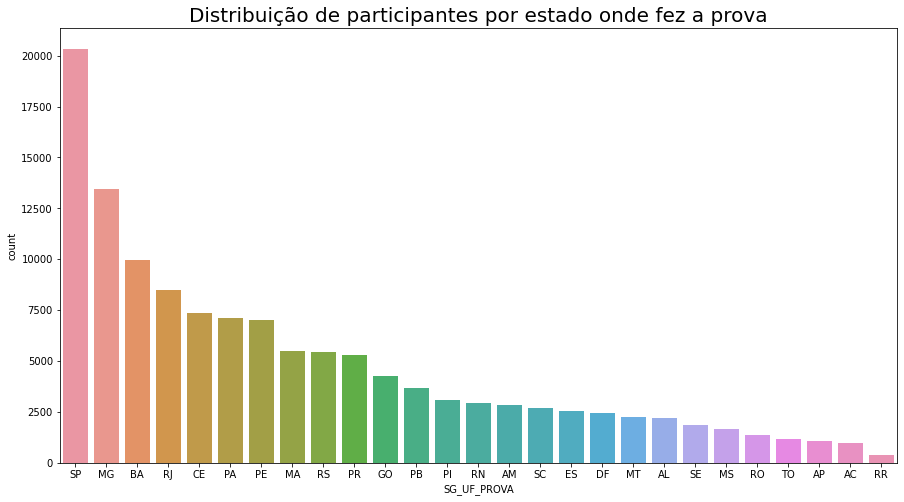

In [23]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x=enem.SG_UF_PROVA.sort_values(ascending=True), order=enem.SG_UF_PROVA.value_counts().index)
ax.set_title('Distribuição de participantes por estado onde fez a prova', fontsize=20);



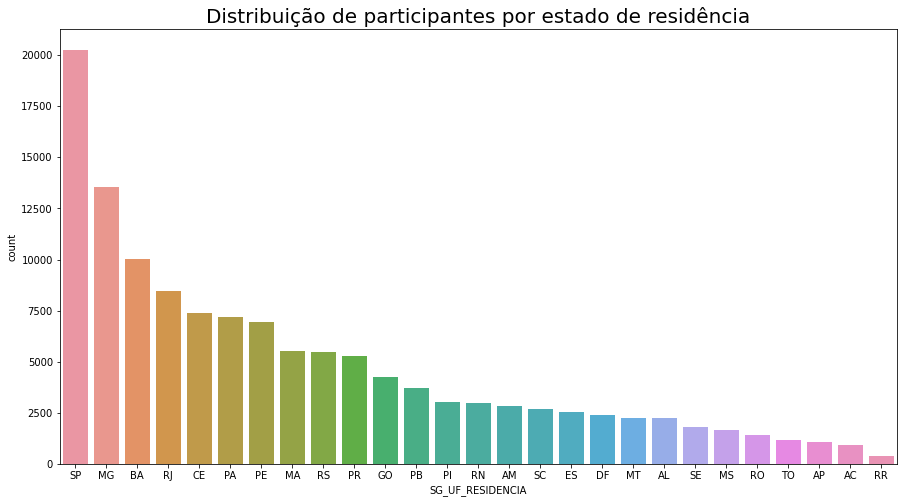

In [24]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x=enem.SG_UF_RESIDENCIA.sort_values(ascending=True),order=enem.SG_UF_PROVA.value_counts().index)
ax.set_title('Distribuição de participantes por estado de residência', fontsize=20);

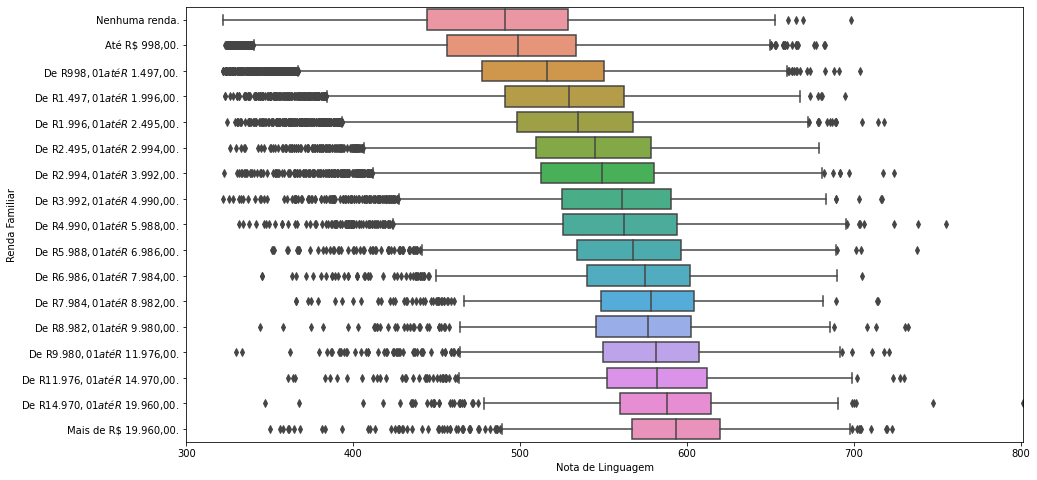

In [48]:
#boxplot das notas de linguagem pela renda familiar
plt.figure(figsize=(15,8))
ax = sns.boxplot(x=enem.NU_NOTA_LC, y=enem.Q006.sort_values())
ax.set_yticklabels(renda_familiar.values())
ax.set_ylabel('Renda Familiar')
ax.set_xlabel('Nota de Linguagem')
ax.set_xlim((300,enem.NU_NOTA_LC.max()));



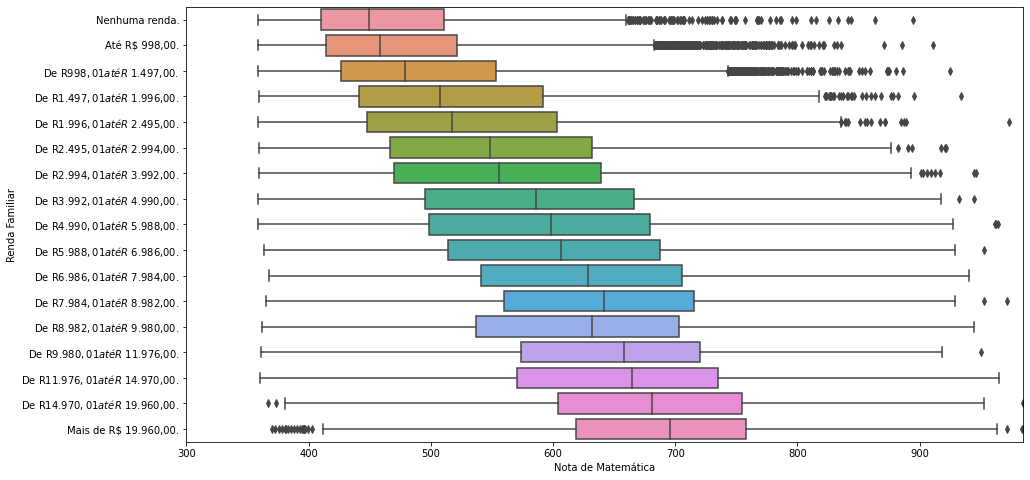

In [49]:
#boxplot das notas de linguagem pela renda familiar
plt.figure(figsize=(15,8))
ax = sns.boxplot(x=enem.NU_NOTA_MT, y=enem.Q006.sort_values())
ax.set_yticklabels(renda_familiar.values())
ax.set_ylabel('Renda Familiar')
ax.set_xlabel('Nota de Matemática')
ax.set_xlim((300,enem.NU_NOTA_MT.max()));

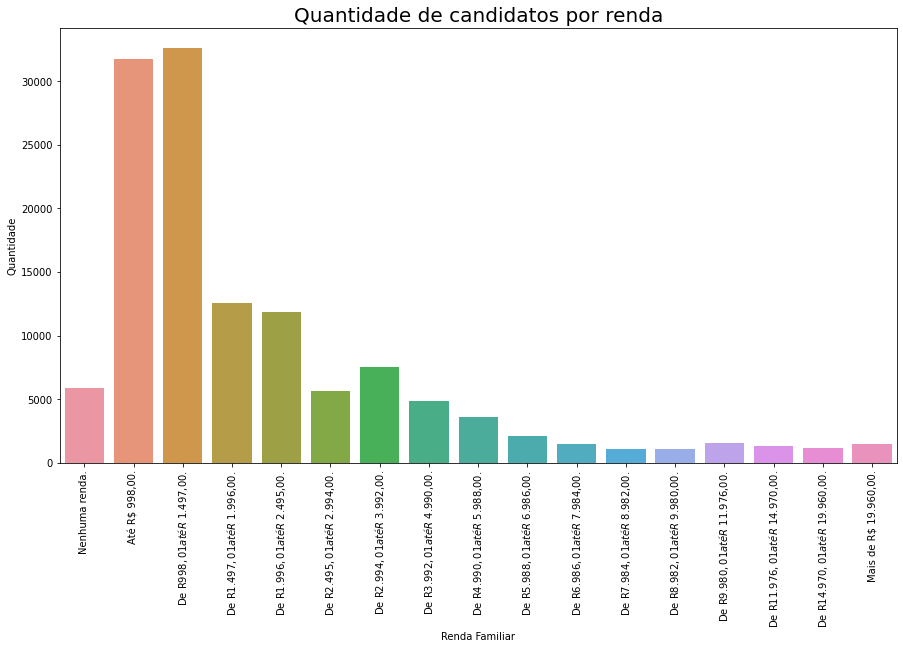

In [56]:
#distribuição de renda
plt.figure(figsize=(15,8))
ax = sns.countplot(x=enem.Q006.sort_values(ascending=True))
ax.set_xticklabels(renda_familiar.values(), rotation=90)
ax.set_xlabel('Renda Familiar')
ax.set_ylabel('Quantidade')
ax.set_title('Quantidade de candidatos por renda', fontsize=20);


In [57]:
enem.NU_IDADE.unique()

array([17, 23, 35, 16, 18, 21, 19, 22, 28, 36, 15, 51, 32, 25, 26, 31, 42,
       48, 30, 20, 29, 24, 47, 33, 57, 40, 49, 39, 53, 55, 38, 44, 27, 37,
       41, 54, 14, 34, 65, 46, 43, 50, 52, 59, 62, 70, 45, 58, 60, 56, 68,
       61, 63, 64, 73, 69, 71, 66, 67, 13, 77, 82, 72, 76, 75])

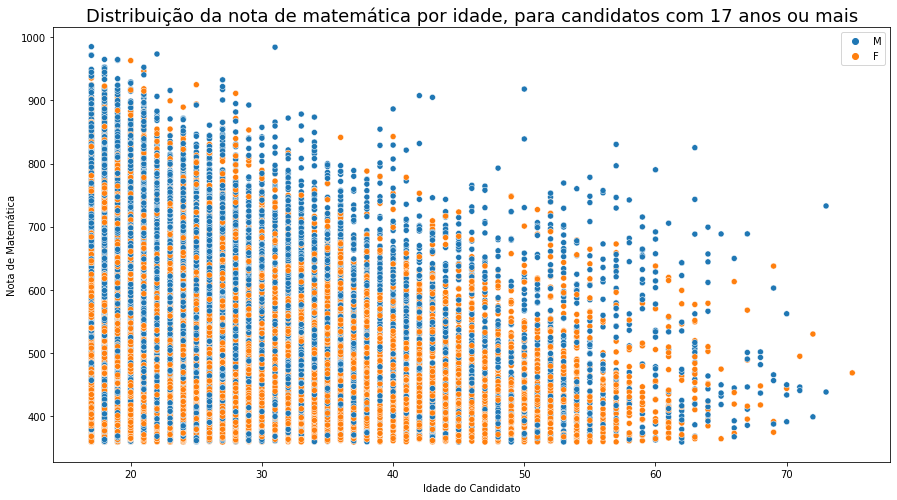

In [92]:
#scatterplot idade x nota
nota = enem.query('NU_NOTA_MT > 0 and NU_IDADE >= 17')
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x=enem.NU_IDADE, y=nota.NU_NOTA_MT, hue=enem.TP_SEXO)
ax.set_title('Distribuição da nota de matemática por idade, para candidatos com 17 anos ou mais', fontsize=18)
ax.set_ylabel('Nota de Matemática')
ax.set_xlabel('Idade do Candidato')
ax.legend()
plt.show()

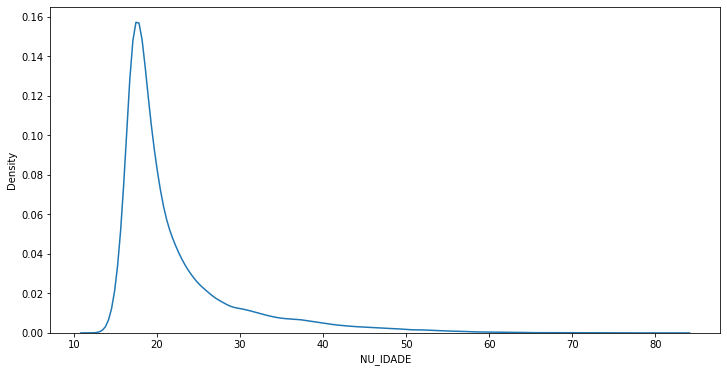

In [69]:
#distribuição de idades no dataset
plt.figure(figsize=(12,6))
sns.kdeplot(x=enem.NU_IDADE);

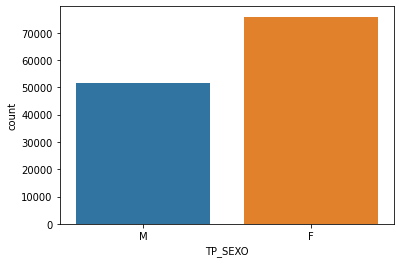

In [83]:
sns.countplot(x=enem.TP_SEXO);

In [98]:
feminino = enem.query('TP_SEXO == "F" and NU_NOTA_MT >0')
masculino = enem.query('TP_SEXO == "M" and NU_NOTA_MT >0')

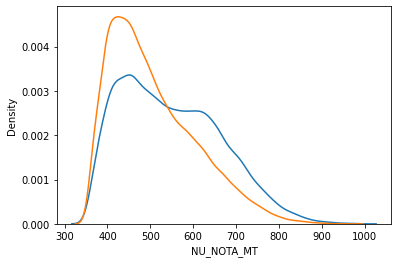

In [101]:
sns.kdeplot(masculino.NU_NOTA_MT)
sns.kdeplot(feminino.NU_NOTA_MT);

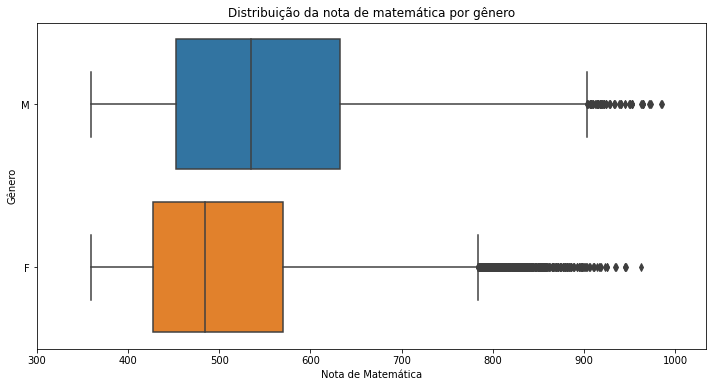

In [85]:
#visualizando notas por gênero
plt.figure(figsize=(12,6))
ax = sns.boxplot(x=enem.NU_NOTA_MT, y=enem.TP_SEXO)
ax.set_title('Distribuição da nota de matemática por gênero')
ax.set_xlabel('Nota de Matemática')
ax.set_ylabel('Gênero')
ax.set_xlim(left=300);



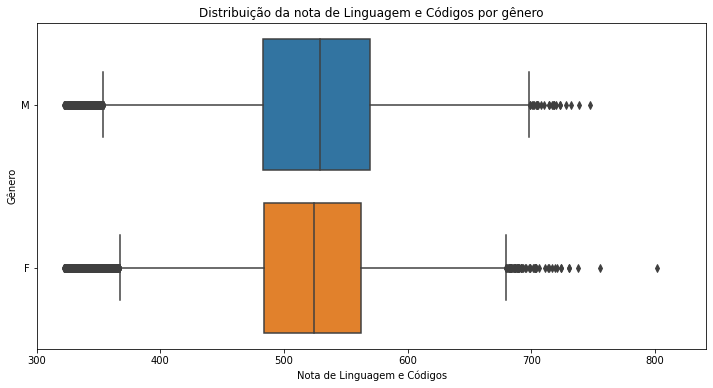

In [93]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(x=enem.NU_NOTA_LC, y=enem.TP_SEXO)
ax.set_title('Distribuição da nota de Linguagem e Códigos por gênero')
ax.set_xlabel('Nota de Linguagem e Códigos')
ax.set_ylabel('Gênero')
ax.set_xlim(left=300);

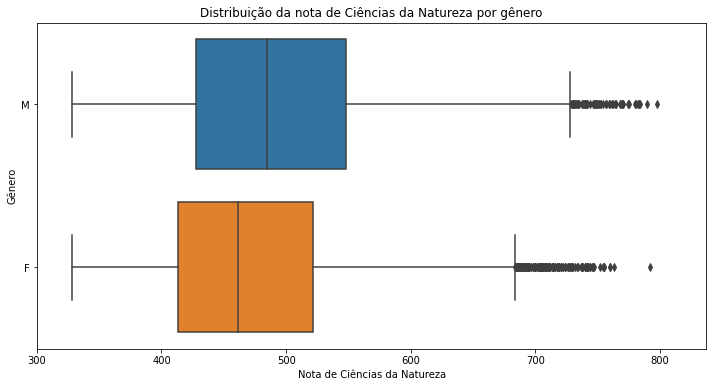

In [88]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(x=enem.NU_NOTA_CN, y=enem.TP_SEXO)
ax.set_title('Distribuição da nota de Ciências da Natureza por gênero')
ax.set_xlabel('Nota de Ciências da Natureza')
ax.set_ylabel('Gênero')
ax.set_xlim(left=300);

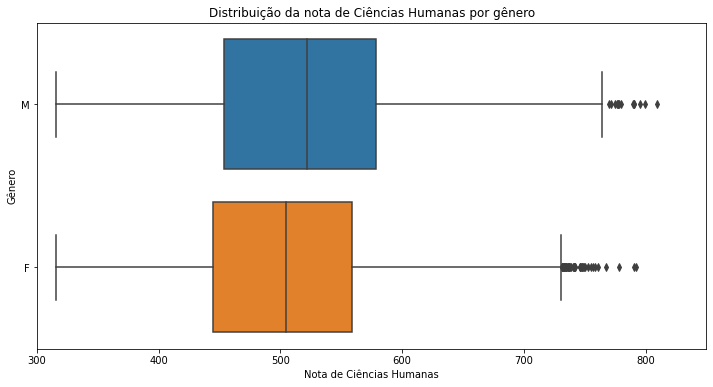

In [89]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(x=enem.NU_NOTA_CH, y=enem.TP_SEXO)
ax.set_title('Distribuição da nota de Ciências Humanas por gênero')
ax.set_xlabel('Nota de Ciências Humanas')
ax.set_ylabel('Gênero')
ax.set_xlim(left=300);

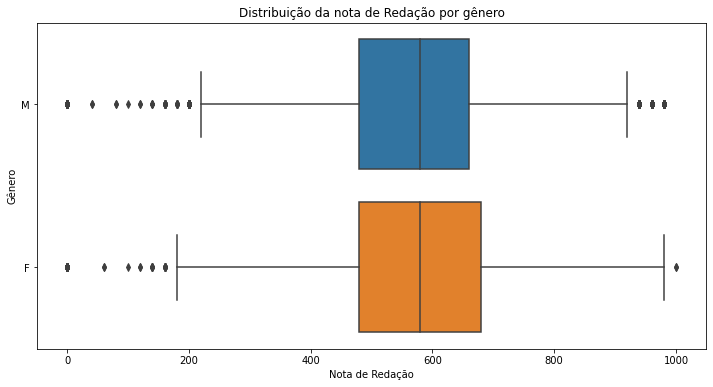

In [102]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(x=enem.NU_NOTA_REDACAO, y=enem.TP_SEXO)
ax.set_title('Distribuição da nota de Redação por gênero')
ax.set_xlabel('Nota de Redação')
ax.set_ylabel('Gênero');


In [246]:
#crosstab
cross = pd.DataFrame(pd.crosstab(index=enem.Q006.replace(renda_familiar), columns=enem.TP_SEXO, aggfunc={'mean'}, values=enem.NU_NOTA_MT))

In [247]:
#tabela cruzada entre gênero e renda familiar com a média da nota de matemática
cross

mean            
TP_SEXO                                     F           M
Q006                                                     
Até R$ 998,00.                     465.370679  496.440509
De R$ 1.497,01 até R$ 1.996,00.    506.047480  541.932542
De R$ 1.996,01 até R$ 2.495,00.    515.615123  549.361261
De R$ 11.976,01 até R$ 14.970,00.  635.563406  668.359781
De R$ 14.970,01 até R$ 19.960,00.  653.794635  689.581435
De R$ 2.495,01 até R$ 2.994,00.    539.543821  571.177580
De R$ 2.994,01 até R$ 3.992,00.    544.059601  579.234281
De R$ 3.992,01 até R$ 4.990,00.    569.406398  603.167933
De R$ 4.990,01 até R$ 5.988,00.    580.669599  607.604208
De R$ 5.988,01 até R$ 6.986,00.    590.599368  613.889664
De R$ 6.986,01 até R$ 7.984,00.    608.060413  634.118655
De R$ 7.984,01 até R$ 8.982,00.    617.886105  651.248115
De R$ 8.982,01 até R$ 9.980,00.    606.034137  645.207452
De R$ 9.980,01 até R$ 11.976,00.   629.388688  659.301647
De R$ 998,01 até R$ 1.497,00.      483.811239  516.526793
Mais de R$ 19.960,00.              669.155806  695.255326
Nenhuma renda.                     458.162635  490.767776

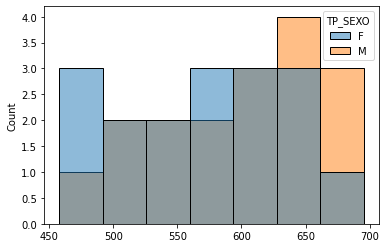

In [175]:
sns.histplot(cross);

In [176]:
#crosstab
cross = pd.DataFrame(pd.crosstab(index=enem.TP_ESCOLA.replace(tipo_escola), columns=enem.TP_SEXO, aggfunc='mean', values=enem.NU_NOTA_MT))

In [177]:
cross

TP_SEXO,F,M
TP_ESCOLA,,
privada,607.630410,632.004309
pública,489.774463,525.878144
sem resposta,505.636954,549.647676


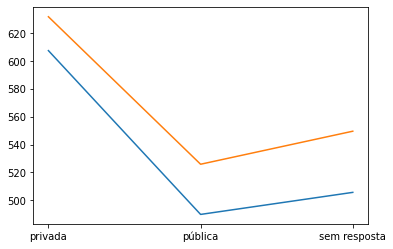

In [178]:
plt.plot(cross);

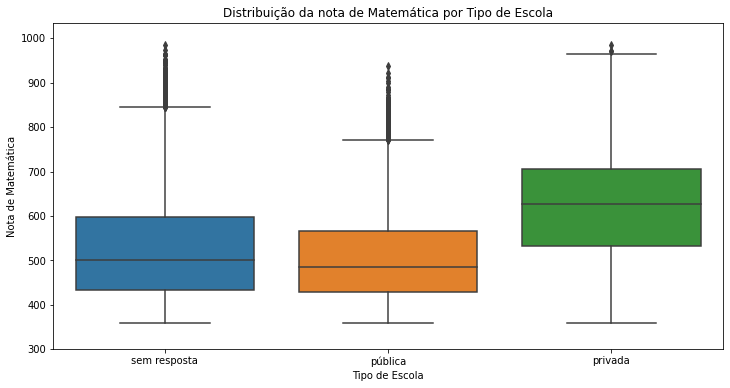

In [179]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(x=enem.TP_ESCOLA, y=enem.NU_NOTA_MT)
ax.set_title('Distribuição da nota de Matemática por Tipo de Escola')
ax.set_xticklabels(tipo_escola.values())
ax.set_ylabel('Nota de Matemática')
ax.set_xlabel('Tipo de Escola')
ax.set_ylim(bottom=300);

In [180]:
#crosstab
cross = pd.DataFrame(pd.crosstab(index=enem.Q006, 
                                 columns=enem.TP_ESCOLA.replace(tipo_escola)))
cross

TP_ESCOLA,privada,pública,sem resposta
Q006,,,
A,45,1653,4142
B,215,9280,22295
C,458,8497,23639
D,368,2762,9425
E,393,3024,8446
F,317,1238,4085
G,456,1855,5216
H,506,871,3439
I,438,719,2395


In [181]:
cross['Renda'] = renda_familiar.values()

In [182]:
cross.set_index( 'Renda', inplace=True)

In [183]:
#incluindo uma coluna para o percentual de candidatos em escola privada
cross['Percentual_privada'] = round((cross['privada'] / (cross['privada'] + cross['pública'] + cross['sem resposta']))*100,2)

In [184]:
cross

TP_ESCOLA,privada,pública,sem resposta,Percentual_privada
Renda,,,,
Nenhuma renda.,45,1653,4142,0.77
"Até R$ 998,00.",215,9280,22295,0.68
"De R$ 998,01 até R$ 1.497,00.",458,8497,23639,1.41
"De R$ 1.497,01 até R$ 1.996,00.",368,2762,9425,2.93
"De R$ 1.996,01 até R$ 2.495,00.",393,3024,8446,3.31
"De R$ 2.495,01 até R$ 2.994,00.",317,1238,4085,5.62
"De R$ 2.994,01 até R$ 3.992,00.",456,1855,5216,6.06
"De R$ 3.992,01 até R$ 4.990,00.",506,871,3439,10.51
"De R$ 4.990,01 até R$ 5.988,00.",438,719,2395,12.33


In [192]:
#crosstab
cross = pd.DataFrame(pd.crosstab(index=enem.Q006, 
                                 columns=enem.TP_ESCOLA.replace(tipo_escola),
                                 aggfunc=('mean'), 
                                 values=enem.NU_NOTA_MT))
cross

TP_ESCOLA,privada,pública,sem resposta
Q006,,,
A,548.165116,464.648122,469.640912
B,532.171220,475.240250,475.598369
C,550.403704,492.538008,496.637109
D,572.224784,518.977743,520.160796
E,590.671129,521.215128,530.581796
F,591.640328,543.033333,553.873394
G,595.992906,539.879877,564.099452
H,611.156701,564.490897,586.111651
I,632.480238,553.748447,598.584202


In [193]:
cross['Renda'] = renda_familiar.values()
cross.set_index( 'Renda', inplace=True)

In [194]:
cross

TP_ESCOLA,privada,pública,sem resposta
Renda,,,
Nenhuma renda.,548.165116,464.648122,469.640912
"Até R$ 998,00.",532.171220,475.240250,475.598369
"De R$ 998,01 até R$ 1.497,00.",550.403704,492.538008,496.637109
"De R$ 1.497,01 até R$ 1.996,00.",572.224784,518.977743,520.160796
"De R$ 1.996,01 até R$ 2.495,00.",590.671129,521.215128,530.581796
"De R$ 2.495,01 até R$ 2.994,00.",591.640328,543.033333,553.873394
"De R$ 2.994,01 até R$ 3.992,00.",595.992906,539.879877,564.099452
"De R$ 3.992,01 até R$ 4.990,00.",611.156701,564.490897,586.111651
"De R$ 4.990,01 até R$ 5.988,00.",632.480238,553.748447,598.584202


In [195]:
#crosstab gênero e estado civil
cross = pd.DataFrame(pd.crosstab(index=enem.TP_ESTADO_CIVIL.replace(estado_civil), 
                                 columns=enem.TP_SEXO))
cross

TP_SEXO,F,M
TP_ESTADO_CIVIL,,
casado(a)/união estável,6029,3884
divorciado(a),1499,778
não informado,2954,2172
solteiro(a),65278,44637
viúvo(a),123,26


In [196]:
#crosstab gênero e estado civil
cross = pd.DataFrame(pd.crosstab(index=enem.TP_ESTADO_CIVIL.replace(estado_civil), 
                                 columns=enem.TP_SEXO, aggfunc='mean', values=enem.NU_NOTA_MT))
cross

TP_SEXO,F,M
TP_ESTADO_CIVIL,,
casado(a)/união estável,473.089613,526.397183
divorciado(a),472.574053,534.550303
não informado,484.486071,546.476211
solteiro(a),510.285855,550.383458
viúvo(a),448.293671,522.875000


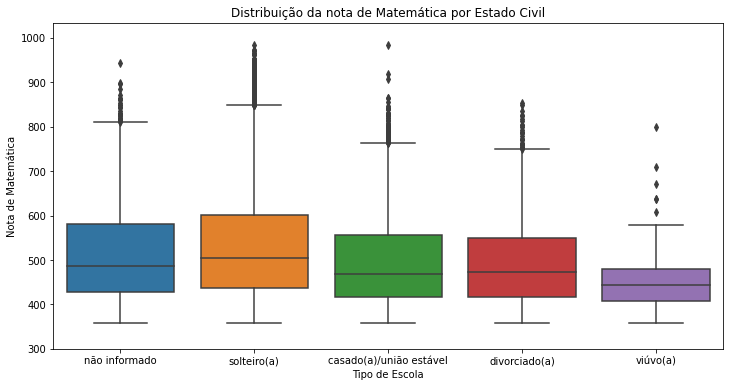

In [197]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(x=enem.TP_ESTADO_CIVIL, y=enem.NU_NOTA_MT)
ax.set_title('Distribuição da nota de Matemática por Estado Civil')
ax.set_xticklabels(estado_civil.values())
ax.set_ylabel('Nota de Matemática')
ax.set_xlabel('Tipo de Escola')
ax.set_ylim(bottom=300);

In [200]:
#crosstab idade e estado civil
cross = pd.DataFrame(pd.crosstab(index=enem.NU_IDADE, 
                                 columns=enem.TP_ESTADO_CIVIL.replace(estado_civil)))
cross

TP_ESTADO_CIVIL,casado(a)/união estável,divorciado(a),não informado,solteiro(a),viúvo(a)
NU_IDADE,,,,,
13,0,0,0,4,0
14,0,1,7,133,0
15,5,4,54,1946,0
16,16,38,245,7530,1
17,93,111,569,20483,0
18,139,151,508,20652,2
19,135,75,290,13916,2
20,173,51,237,9951,1
21,206,39,199,6819,4


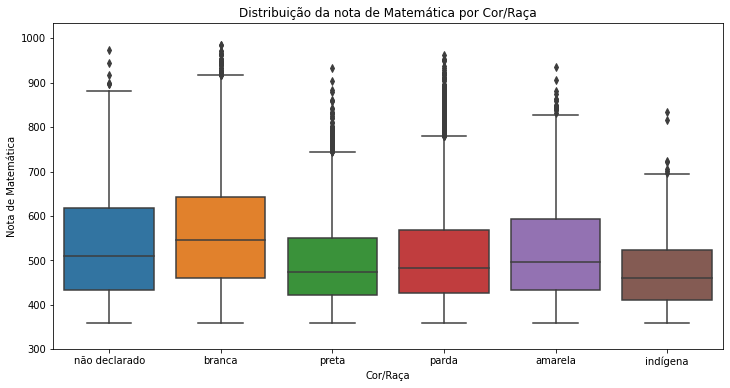

In [201]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(x=enem.TP_COR_RACA, y=enem.NU_NOTA_MT)
ax.set_title('Distribuição da nota de Matemática por Cor/Raça')
ax.set_xticklabels(cor.values())
ax.set_ylabel('Nota de Matemática')
ax.set_xlabel('Cor/Raça')
ax.set_ylim(bottom=300);

In [202]:
#crosstab
cross = pd.DataFrame(pd.crosstab(index=enem.Q006, 
                                 columns=enem.TP_COR_RACA.replace(cor)))


In [203]:
cross['Renda'] = renda_familiar.values()
cross.set_index( 'Renda', inplace=True)
cross

TP_COR_RACA,amarela,branca,indígena,não declarado,parda,preta
Renda,,,,,,
Nenhuma renda.,133,1155,85,158,3357,952
"Até R$ 998,00.",832,6596,293,624,18321,5124
"De R$ 998,01 até R$ 1.497,00.",822,9510,226,605,16374,5057
"De R$ 1.497,01 até R$ 1.996,00.",285,4731,58,269,5663,1549
"De R$ 1.996,01 até R$ 2.495,00.",239,4890,66,210,5099,1359
"De R$ 2.495,01 até R$ 2.994,00.",122,2693,15,104,2191,515
"De R$ 2.994,01 até R$ 3.992,00.",154,3777,17,153,2778,648
"De R$ 3.992,01 até R$ 4.990,00.",82,2656,8,97,1606,367
"De R$ 4.990,01 até R$ 5.988,00.",69,2002,9,69,1157,246


In [204]:
cor

{0: 'não declarado',
 1: 'branca',
 2: 'preta',
 3: 'parda',
 4: 'amarela',
 5: 'indígena'}

In [205]:
#incluindo uma coluna para o percentual de candidatos em brancos
cross['Percentual_brancos'] = round((cross['branca'] / 
                                     (cross['branca'] + cross['não declarado']
                                      + cross['preta']+ cross['parda'] 
                                      + cross['amarela'] + cross['indígena']))*100,2)
cross

TP_COR_RACA,amarela,branca,indígena,não declarado,parda,preta,Percentual_brancos
Renda,,,,,,,
Nenhuma renda.,133,1155,85,158,3357,952,19.78
"Até R$ 998,00.",832,6596,293,624,18321,5124,20.75
"De R$ 998,01 até R$ 1.497,00.",822,9510,226,605,16374,5057,29.18
"De R$ 1.497,01 até R$ 1.996,00.",285,4731,58,269,5663,1549,37.68
"De R$ 1.996,01 até R$ 2.495,00.",239,4890,66,210,5099,1359,41.22
"De R$ 2.495,01 até R$ 2.994,00.",122,2693,15,104,2191,515,47.75
"De R$ 2.994,01 até R$ 3.992,00.",154,3777,17,153,2778,648,50.18
"De R$ 3.992,01 até R$ 4.990,00.",82,2656,8,97,1606,367,55.15
"De R$ 4.990,01 até R$ 5.988,00.",69,2002,9,69,1157,246,56.36


In [206]:
#crosstab
cross = pd.DataFrame(pd.crosstab(index=enem.Q006, 
                                 columns=enem.TP_COR_RACA.replace(cor),
                                 aggfunc=('mean'), 
                                 values=enem.NU_NOTA_MT))


In [207]:
cross['Renda'] = renda_familiar.values()
cross.set_index( 'Renda', inplace=True)
cross

TP_COR_RACA,amarela,branca,indígena,não declarado,parda,preta
Renda,,,,,,
Nenhuma renda.,479.737500,485.746567,451.679245,469.928713,464.323762,463.860518
"Até R$ 998,00.",468.509233,488.817738,463.179812,478.810263,473.256830,470.909814
"De R$ 998,01 até R$ 1.497,00.",494.142509,509.981186,465.111184,501.404218,491.746213,486.989446
"De R$ 1.497,01 até R$ 1.996,00.",515.609453,533.231188,484.616667,529.025806,516.606431,507.302140
"De R$ 1.996,01 até R$ 2.495,00.",536.035393,544.870863,499.428261,554.219876,520.949905,507.515005
"De R$ 2.495,01 até R$ 2.994,00.",561.053684,566.493340,518.422222,545.604000,544.191698,527.577151
"De R$ 2.994,01 até R$ 3.992,00.",573.711207,569.360891,527.930769,573.716393,550.553258,534.522774
"De R$ 3.992,01 até R$ 4.990,00.",616.717568,598.322487,566.380000,615.321127,563.901787,561.531690
"De R$ 4.990,01 até R$ 5.988,00.",619.927586,605.174565,571.114286,579.185000,581.572318,550.571144


In [209]:
#crosstab
cross = pd.DataFrame(pd.crosstab(index=enem.SG_UF_RESIDENCIA, 
                                 columns=enem.TP_COR_RACA.replace(cor)))

In [210]:
cross

TP_COR_RACA,amarela,branca,indígena,não declarado,parda,preta
SG_UF_RESIDENCIA,,,,,,
AC,32,141,10,15,646,102
AL,80,492,23,36,1370,262
AM,59,403,85,70,2035,168
AP,15,159,9,12,728,124
BA,268,1501,67,235,5117,2852
CE,169,1502,37,201,4856,616
DF,52,755,14,59,1188,340
ES,43,890,8,36,1175,398
GO,185,1378,17,106,2079,503


In [211]:
#incluindo uma coluna para o percentual de candidatos em brancos
cross['Percentual_brancos'] = round((cross['branca'] / 
                                     (cross['branca'] + cross['não declarado']
                                      + cross['preta']+ cross['parda'] 
                                      + cross['amarela'] + cross['indígena']))*100,2)
cross

TP_COR_RACA,amarela,branca,indígena,não declarado,parda,preta,Percentual_brancos
SG_UF_RESIDENCIA,,,,,,,
AC,32,141,10,15,646,102,14.90
AL,80,492,23,36,1370,262,21.74
AM,59,403,85,70,2035,168,14.29
AP,15,159,9,12,728,124,15.19
BA,268,1501,67,235,5117,2852,14.95
CE,169,1502,37,201,4856,616,20.35
DF,52,755,14,59,1188,340,31.35
ES,43,890,8,36,1175,398,34.90
GO,185,1378,17,106,2079,503,32.29


In [232]:
enem.query('NU_NOTA_REDACAO == 0').shape

(3505, 136)

In [228]:
enem.loc[enem.NU_NOTA_REDACAO.isna()]

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
10,190001005028,2019,1506807,Santarém,15,PA,28,F,2,3,1,1506807.0,Santarém,15.0,PA,1,9,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1506807,Santarém,15,PA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,B,A,B,2,B,A,B,C,A,A,B,A,A,A,A,A,A,B,B,A,B,A,A,A
11,190001005057,2019,1501709,Bragança,15,PA,36,F,1,3,1,1501709.0,Bragança,15.0,PA,1,13,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1501709,Bragança,15,PA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,C,A,A,4,B,A,B,D,A,A,B,A,A,A,A,A,A,B,B,A,B,A,A,B
26,190001005484,2019,1504208,Marabá,15,PA,26,M,2,3,1,1721208.0,Tocantinópolis,17.0,TO,1,8,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1504208,Marabá,15,PA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,B,C,C,2,C,A,B,B,A,A,B,A,A,A,B,A,A,B,A,A,C,A,B,B
38,190001006086,2019,1508126,Ulianópolis,15,PA,29,F,1,3,1,2108108.0,Paulo Ramos,21.0,MA,1,11,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1502939,Dom Eliseu,15,PA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,A,A,5,C,A,B,C,A,B,B,A,A,A,A,A,A,B,B,A,C,A,A,B
40,190001006292,2019,1504422,Marituba,15,PA,24,M,1,1,1,1504422.0,Marituba,15.0,PA,1,5,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1504422,Marituba,15,PA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,F,B,6,G,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,D,A,A,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


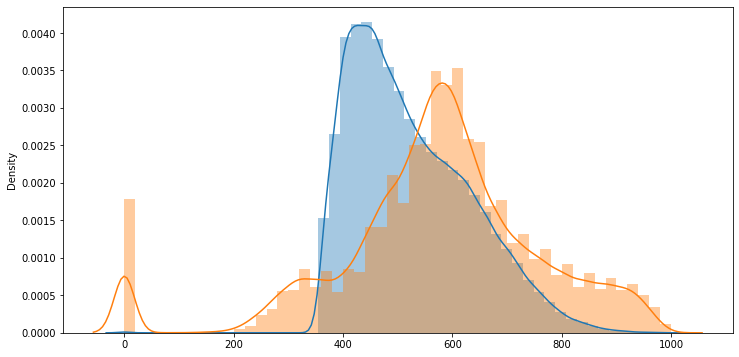

In [239]:
plt.figure(figsize=(12,6))
sns.distplot(x=enem.NU_NOTA_MT);
sns.distplot(x=enem.NU_NOTA_REDACAO);

In [249]:
#crosstab
cross = pd.DataFrame(pd.crosstab(index=enem.SG_UF_RESIDENCIA, 
                                 columns=enem.TP_SEXO))
cross

TP_SEXO,F,M
SG_UF_RESIDENCIA,,
AC,556,390
AL,1380,883
AM,1610,1210
AP,618,429
BA,6343,3697
CE,4139,3242
DF,1428,980
ES,1532,1018
GO,2579,1689


In [251]:
#crosstab
cross = pd.DataFrame(pd.crosstab(index=enem.SG_UF_RESIDENCIA, 
                                 columns=enem.TP_SEXO, aggfunc={'mean', 'median'}, values = enem.NU_NOTA_MT))
cross

mean              median        
TP_SEXO                    F           M       F       M
SG_UF_RESIDENCIA                                        
AC                462.797000  494.903203  451.35  481.80
AL                480.788230  517.582963  458.45  497.50
AM                473.815276  499.713299  456.20  478.00
AP                467.240371  491.470000  446.40  467.85
BA                485.701668  529.017250  462.80  511.15
CE                503.885586  540.766363  481.60  520.50
DF                511.179726  565.051114  489.20  562.80
ES                524.812281  570.137190  506.30  562.10
GO                508.878910  548.553311  486.00  534.30
MA                470.128071  503.665354  452.30  483.70
MG                528.836716  573.851050  509.80  570.40
MS                495.466411  533.881837  474.65  522.05
MT                488.673870  527.699676  469.50  501.60
PA                470.565287  503.513397  452.10  481.30
PB                493.623613  529.567144  471.55  507.60
PE                499.404498  542.522105  479.50  525.40
PI                485.315911  517.425652  458.20  486.65
PR                527.018077  564.993395  511.30  559.35
RJ                519.854725  569.185223  497.95  564.20
RN                492.110490  548.150671  472.50  539.40
RO                480.776265  514.124324  464.40  492.55
RR                494.392701  532.400847  480.60  504.55
RS                522.065608  568.326821  504.00  566.10
SC                532.519677  572.251214  516.40  570.55
SE                490.613926  537.547834  471.60  518.20
SP                534.270538  579.911873  517.15  578.50
TO                484.158271  519.483587  468.35  502.90

In [254]:
enem.TP_SEXO.value_counts(normalize=True)

F    0.595721
M    0.404279
Name: TP_SEXO, dtype: float64

In [255]:
#crosstab
cross = pd.DataFrame(pd.crosstab(index=enem.SG_UF_RESIDENCIA, 
                                 columns=enem.TP_SEXO, aggfunc={'mean', 'median'}, values = enem.NU_NOTA_REDACAO))
cross

mean             median       
TP_SEXO                    F           M      F      M
SG_UF_RESIDENCIA                                      
AC                521.864802  508.266667  540.0  540.0
AL                557.129543  548.437500  560.0  560.0
AM                508.665448  495.420219  520.0  520.0
AP                528.625000  513.416928  560.0  540.0
BA                557.213317  552.919475  560.0  560.0
CE                581.488114  554.491829  600.0  580.0
DF                588.451730  573.994334  600.0  580.0
ES                599.775087  576.975228  600.0  580.0
GO                584.873354  553.884555  600.0  560.0
MA                544.035631  532.319260  560.0  560.0
MG                601.261908  587.034108  600.0  600.0
MS                567.153285  536.321839  580.0  560.0
MT                544.478528  515.029940  560.0  540.0
PA                551.931920  553.794989  560.0  560.0
PB                579.920904  572.518337  580.0  580.0
PE                566.483384  558.403285  580.0  580.0
PI                571.586766  547.580478  580.0  560.0
PR                577.392438  558.276671  580.0  580.0
RJ                600.410283  590.850263  600.0  600.0
RN                580.977444  576.952191  580.0  580.0
RO                525.135566  523.224181  560.0  540.0
RR                517.718121  511.612903  520.0  540.0
RS                588.547284  563.707317  600.0  580.0
SC                591.530782  563.785633  600.0  580.0
SE                593.805714  587.885906  600.0  580.0
SP                597.094899  578.745159  600.0  580.0
TO                558.285714  544.507042  560.0  560.0

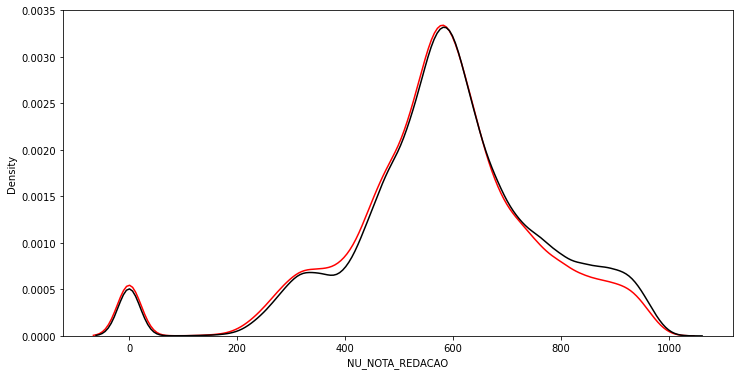

In [262]:
plt.figure(figsize=(12,6))
sns.kdeplot(x=masculino.NU_NOTA_REDACAO, color='r')
sns.kdeplot(x=feminino.NU_NOTA_REDACAO, color='k');


<Figure size 864x432 with 0 Axes>

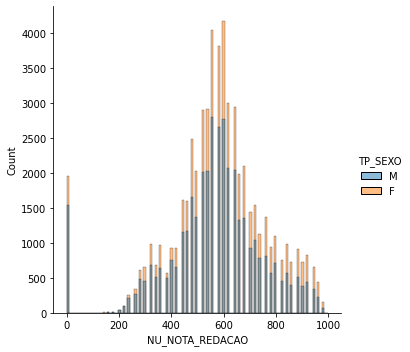

In [265]:
plt.figure(figsize=(12,6))
ax = sns.displot(x=enem.NU_NOTA_REDACAO, hue=enem.TP_SEXO);


In [267]:
#criando o CSV com os dados
enem.to_csv('enem.csv')